In [3]:
import numpy as np
import pandas as pd

A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])
B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])
C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]
ABC = pd.concat(dfs, axis=1)
ABC.columns = ["GRUP_A", "GRUP_B", "GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


In [15]:
# Varsayim kontrolü
from scipy.stats import shapiro

print(shapiro(ABC["GRUP_A"]))
# H0 reddedilemiyor

print(shapiro(ABC["GRUP_B"]))
# H0 reddedilemiyor

print(shapiro(ABC["GRUP_C"]))
# H0 reddedilemiyor

# 3 deger icin normallik varsayimi saglanir

(0.9697431921958923, 0.5321715474128723)
(0.9789854884147644, 0.7979801297187805)
(0.9579201340675354, 0.273820161819458)


In [20]:
from scipy import stats
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])
# H0 reddedilemiyor varyanslar homojendir

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [49]:
# hipotez testi
from scipy.stats import f_oneway

test_istatistigi, pvalue = f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])
print("test istatistigi: {:.4f}, p-value: {:.4f}" .format(test_istatistigi, pvalue))
# H0 red

test istatistigi: 74.6928, p-value: 0.0000


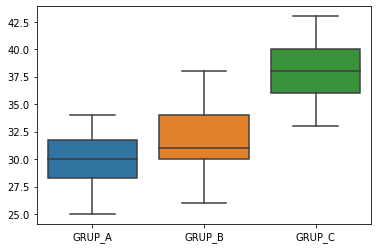

In [50]:
import seaborn as sns
sns.boxplot(data=ABC)

In [53]:
# Nonparametrik hipotez testi
from scipy.stats import kruskal

test_istatistigi, pvalue = kruskal(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])
print("test istatistigi: {:.4f} p-value: {:.4f}" .format(test_istatistigi, pvalue))
# H0 red

test istatistigi: 54.1982 p-value: 0.0000
